# 信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。



# 【問題1】コンペティション内容の把握
#### 以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。
#### このコンペティションでは何を予測する？目的変数は？
#### 企業がこのコンペティションを開催することで得られるメリットは？
#### データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

前向きで安全なローンを行うにあたっては、適切なデフォルトリスクを推定することで多くの人がローンの借り入れを実施できる。  
そのため、顧客情報を説明変数として、ローンがデフォルトするかしないかを目的変数として分類するアルゴリズムを作る。  
このコンペにより、主催者はより多くの人とローン契約を結ぶことができ、またローンのデフォルトによる損失を抑えることができる。  
予測変数に影響しそうな指標は、年収、ローンの大きさ、年齢などである。

# 【問題2】データの概観
#### データの概観を把握してください
#### （例）
#### .head()、.info()、describe()などを使う
#### 欠損値の有無を見る
#### クラスごとのデータ数をグラフに出す

In [32]:
#　データの取得と確認
import pandas as pd
df_origin = pd.read_csv('../datasets/application_train.csv',encoding='cp932')
df_origin.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [43]:
df_origin.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

特徴量の数が非常に多いが、重要な特徴量を発見することで制度の高い分析が可能になるのではないか。  
カテゴリデータが多いので、ワンホットエンコーディングで対応する必要がある。

# 【問題4】データ探索
#### 問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。
#### 課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

In [44]:
###############################################
# 予測に使う特徴量・変数と予測したいデータをそれぞれX,yに格納
###############################################

# 1列目(B列)から最終列以前を予測に使う特徴量・変数Xに設定
X  = df_origin.iloc[:,2:]

# 0列（A列）を正解データyに設定
y  = df_origin.iloc[:,1]

display(X.head())
display(y.head())

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [69]:
# # ワンホットエンコーディングが必要なカテゴリカルデータを探す
#############################################

#各特徴量・変数名のデータタイプを確認するため、各表示
X_int_list = X.select_dtypes(include=int).columns
X_float_list = X.select_dtypes(include=float).columns
X_object_list = X.select_dtypes(include=object).columns
X_bool_list = X.select_dtypes(include=bool).columns

print("整数型(int型)の特徴量・変数名：", X_int_list)
print("少数型(float型)の特徴量・変数名：", X_float_list)
print("カテゴリ型(object型)の特徴量・変数名：", X_object_list)
print("真偽(bool型)の特徴量・変数名：", X_bool_list)

整数型(int型)の特徴量・変数名： Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')
少数型(float型)の特徴量・変数名： Index(['AMT_INCOME_TOTAL', 'AM

In [45]:
#############################################
# 欠損値の数、欠損値の割合等をまとめるデータフレームを作成
#############################################

#オリジナルデータと同じ特徴量・変数名を列に持つデータフレームを作成
df_missingno = pd.DataFrame(index=df_origin.columns) 

#欠損値の数を設定
df_missingno['missingno_counts'] = df_origin.isnull().sum()

#欠損値の割合を挿入
df_missingno['missingno_rates'] = df_origin.isnull().sum()/len(df_origin)

#欠損値の数を挿入
df_missingno['data_type'] = df_origin.dtypes

#ユニーク要素の個数をカウント
df_missingno['unique_elements_counts'] = df_origin.nunique()

#ユニーク要素の個数が全体に占める割合（離散値の判定）
df_missingno['unique_elements_rate'] = df_origin.nunique()/len(df_origin)

########################################
# 統計情報と欠損情報をまとめたデータフレームを表示
########################################
pd.concat([df_origin.describe(),df_missingno.T],sort=False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,307511,307499,307233,307511,307511,307511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278181,0.0807288,0.417052,168798,599026,27108.6,538396,0.0208681,-16037,63815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,102790,0.272419,0.722121,237123,402491,14493.7,369446,0.0138313,4363.99,141276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100002,0,0,25650,45000,1615.5,40500,0.00029,-25229,-17912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,189146,0,0,112500,270000,16524,238500,0.010006,-19682,-2760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,278202,0,0,147150,513531,24903,450000,0.01885,-15750,-1213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,367142,0,1,202500,808650,34596,679500,0.028663,-12413,-289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,456255,1,19,1.17e+08,4.05e+06,258026,4.05e+06,0.072508,-7489,365243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
missingno_counts,0,0,0,0,0,12,278,0,0,0,...,0,0,0,96391,0,0,210295,154297,156341,145755
missingno_rates,0,0,0,0,0,3.9023e-05,0.000904033,0,0,0,...,0,0,0,0.313455,0,0,0.683862,0.501761,0.508408,0.473983


In [46]:
#############################
# 欠損値が一つ以上あるリストを確認
#############################

# 欠損のある特徴量を格納するリストを作成
X_null_int_list = []
X_null_float_list = []
X_null_object_list = []
X_null_bool_list = []

# 欠損のあるカラムをデータ型を振り分けて格納
for column in df_origin.columns:
    if df_missingno.loc[column,'missingno_counts'] > 0:
        if df_missingno.loc[column,'data_type'] == 'int64':
            X_null_int_list.append(column)
        if df_missingno.loc[column,'data_type'] == 'float64':
            X_null_float_list.append(column)
        if df_missingno.loc[column,'data_type'] == 'object':
            X_null_object_list.append(column)
        if df_missingno.loc[column,'data_type'] == 'bool':
            X_null_bool_list.append(column)
            
# データ型ごとのカラムリストを格納
display('欠損のある整数型(int型)の特徴量・変数名',X_null_int_list)
display('欠損のある少数型(float型)の特徴量・変数名',X_null_float_list)
display('欠損のあるカテゴリ型(object型)の特徴量・変数名',X_null_object_list)
display('欠損のある真偽(bool型)の特徴量・変数名',X_null_bool_list)

'欠損のある整数型(int型)の特徴量・変数名'

[]

'欠損のある少数型(float型)の特徴量・変数名'

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

'欠損のあるカテゴリ型(object型)の特徴量・変数名'

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

'欠損のある真偽(bool型)の特徴量・変数名'

[]

In [47]:
############################
# ワンホットエンコーディングを実施
############################

# 連続値データではなく、カテゴリカルデータが入っている特徴量・変数の名前をコピペしてをリストに入れる
X_category_column_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                          'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                          'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                          'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
                          'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# ワンホットエンコーディングを行う特徴量・変数名のリストを表示
print("ワンホットエンコーディングを行う特徴量・変数名のリスト",X_category_column_list)

# ワンホットエンコーディングを行う特徴量・変数名のリストを作成
ohe_columns = X_category_column_list

# ワンホットエンコーディングを実施
X_ohe = pd.get_dummies(X, dummy_na=True, columns=ohe_columns)
display("ワンホットエンコーディングを行なった結果のXデータ",X_ohe.head())

ワンホットエンコーディングを行う特徴量・変数名のリスト ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


'ワンホットエンコーディングを行なった結果のXデータ'

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1


In [48]:
############################################
# 連続値データ（カテゴリカルデータ以外）の欠損値補完を行う
############################################
from sklearn.preprocessing import Imputer

# インピュータークラスのインスタンス作成
# カテゴリカルデータの欠損値はワンホットエンコーディングで処理したが、連続値データの欠損値NaNを保管する。
# 処理は列方向(axis=0)で行う.
# 平均値で置き換える場合 strategy='mean'
# 中央値で置き換える場合 strategy='median'
# 最頻値で置き換える場合 strategy='most_frequent'
imp_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_median = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_most_frequent = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)


#ワンホットエンコーディングの置き換え指標で特徴量・変数名をまとめる
imp_mean_columns_list = ['AMT_ANNUITY',
                         'AMT_GOODS_PRICE',
                         'OWN_CAR_AGE',
                         'CNT_FAM_MEMBERS',
                         'EXT_SOURCE_1',
                         'EXT_SOURCE_2',
                         'EXT_SOURCE_3',
                         'APARTMENTS_AVG',
                         'BASEMENTAREA_AVG',
                         'YEARS_BEGINEXPLUATATION_AVG',
                         'YEARS_BUILD_AVG',
                         'COMMONAREA_AVG',
                         'ELEVATORS_AVG',
                         'ENTRANCES_AVG',
                         'FLOORSMAX_AVG',
                         'FLOORSMIN_AVG',
                         'LANDAREA_AVG',
                         'LIVINGAPARTMENTS_AVG',
                         'LIVINGAREA_AVG',
                         'NONLIVINGAPARTMENTS_AVG',
                         'NONLIVINGAREA_AVG',
                         'APARTMENTS_MODE',
                         'BASEMENTAREA_MODE',
                         'YEARS_BEGINEXPLUATATION_MODE',
                         'YEARS_BUILD_MODE',
                         'COMMONAREA_MODE',
                         'ELEVATORS_MODE',
                         'ENTRANCES_MODE',
                         'FLOORSMAX_MODE',
                         'FLOORSMIN_MODE',
                         'LANDAREA_MODE',
                         'LIVINGAPARTMENTS_MODE',
                         'LIVINGAREA_MODE',
                         'NONLIVINGAPARTMENTS_MODE',
                         'NONLIVINGAREA_MODE',
                         'APARTMENTS_MEDI',
                         'BASEMENTAREA_MEDI',
                         'YEARS_BEGINEXPLUATATION_MEDI',
                         'YEARS_BUILD_MEDI',
                         'COMMONAREA_MEDI',
                         'ELEVATORS_MEDI',
                         'ENTRANCES_MEDI',
                         'FLOORSMAX_MEDI',
                         'FLOORSMIN_MEDI',
                         'LANDAREA_MEDI',
                         'LIVINGAPARTMENTS_MEDI',
                         'LIVINGAREA_MEDI',
                         'NONLIVINGAPARTMENTS_MEDI',
                         'NONLIVINGAREA_MEDI',
                         'TOTALAREA_MODE',
                         'OBS_30_CNT_SOCIAL_CIRCLE',
                         'DEF_30_CNT_SOCIAL_CIRCLE',
                         'OBS_60_CNT_SOCIAL_CIRCLE',
                         'DEF_60_CNT_SOCIAL_CIRCLE',
                         'DAYS_LAST_PHONE_CHANGE',
                         'AMT_REQ_CREDIT_BUREAU_HOUR',
                         'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK',
                         'AMT_REQ_CREDIT_BUREAU_MON',
                         'AMT_REQ_CREDIT_BUREAU_QRT',
                         'AMT_REQ_CREDIT_BUREAU_YEAR']

imp_median_columns_list = []
imp_most_frequent_columns_list = []



#欠損処理を行う元となるデータフレームを作成
X_ohe_imp = X_ohe.copy()


# 指定した特徴量・変数名におけるX_trainの各特徴量の平均値を学習、穴埋めを行う
if len(imp_mean_columns_list) > 0:
    imp_mean.fit(X_ohe.loc[:,imp_mean_columns_list])
    X_ohe_imp.loc[:,imp_mean_columns_list] = imp_mean.transform(X_ohe.loc[:,imp_mean_columns_list])
# 指定した特徴量・変数名におけるX_trainの各特徴量の中央値を学習、穴埋めを行う
if len(imp_median_columns_list) > 0:
    imp_median.fit(X_ohe.loc[:,imp_median_columns_list])
    X_ohe_imp.loc[:,imp_median_columns_list] = imp_median.transform(X_ohe.loc[:,imp_median_columns_list])
# 指定した特徴量・変数名におけるX_trainの各特徴量の最頻値を学習、穴埋めを行う
if len(imp_most_frequent_columns_list) > 0:
    imp_most_frequent.fit(X_ohe.loc[:,imp_most_frequent_columns_list])
    X_ohe_imp.loc[:,imp_most_frequent_columns_list] = imp_most_frequent.transform(X_ohe.loc[:,imp_most_frequent_columns_list])


# 最終的なX_ohe_impのデータフレームを表示
display(X_ohe_imp.head())


/Users/tera/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tera/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tera/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1


In [50]:
############################
# 訓練データと検証用データに分割
############################
from sklearn.model_selection import train_test_split



# 交差検証(holdout)のため、学習データを訓練用と検証用に分割
X_train,X_valid,y_train,y_valid = train_test_split(X_ohe_imp,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=0)

# データフレームを配列に整形 #やらなくてもできるが警告が出る
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()

In [53]:
###################################
# モデルを作成して訓練と性能スコア検証を実施
###################################
from sklearn.ensemble import RandomForestClassifier

#ランダムフォレストモデルを作成
rf = RandomForestClassifier(random_state=0)


#ランダムフォレストモデルで訓練と検証データの予測を行い
rf.fit(X_train,y_train) 
y_rf_pred = rf.predict(X_valid)


#ランダムフォレストモデルで予測
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('RondomForest accuracy_score: %.6f' % accuracy_score(y_valid, y_rf_pred))

/Users/tera/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RondomForest accuracy_score: 0.920313


In [55]:
##########################################################
# ランダムフォレストモデルにおける特徴量・変数の重要度データフレームを作成
##########################################################
X_importance = pd.DataFrame(rf.feature_importances_, columns=['feature_importances'], index=X_ohe_imp.columns)
X_importance = X_importance.sort_values(by=["feature_importances"], ascending=False)
display("important feature top100:",X_importance.head(100))

'important feature top10:'

,feature_importances
EXT_SOURCE_2,0.048592
EXT_SOURCE_3,0.046349
DAYS_ID_PUBLISH,0.032809
DAYS_BIRTH,0.031533
DAYS_REGISTRATION,0.031347
AMT_ANNUITY,0.030541
DAYS_LAST_PHONE_CHANGE,0.028546
DAYS_EMPLOYED,0.028414
AMT_CREDIT,0.028000
EXT_SOURCE_1,0.026031


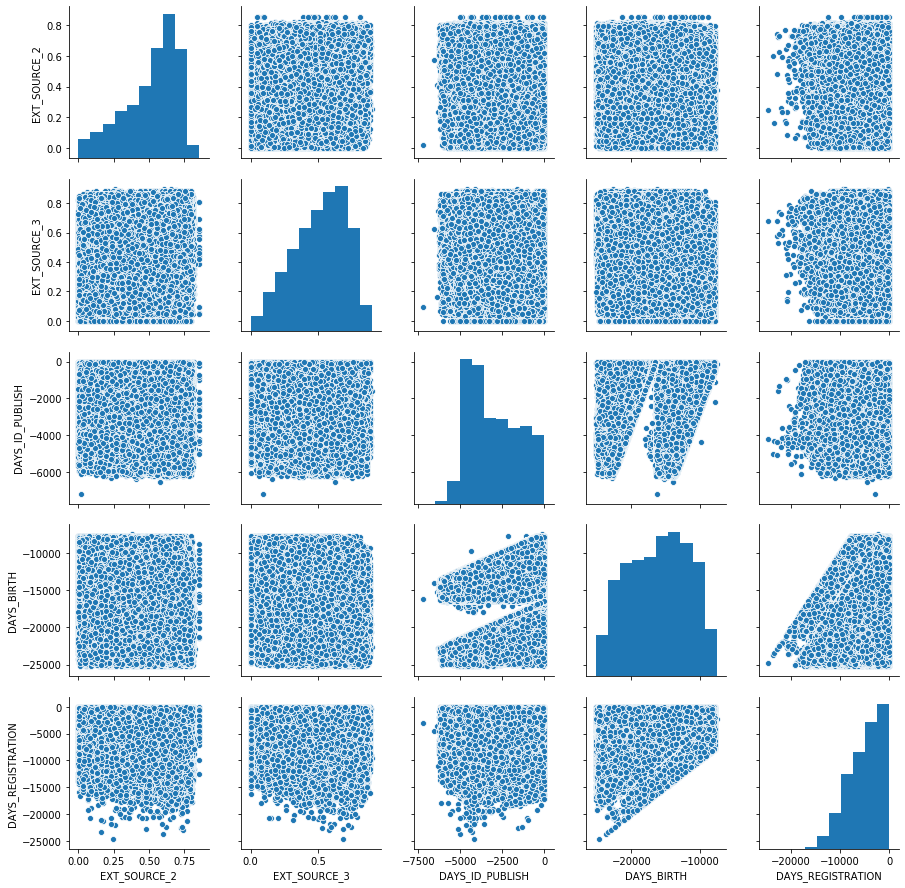

In [60]:
import seaborn as sns
sns.pairplot(X_ohe_imp.loc[:,['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_ID_PUBLISH','DAYS_BIRTH','DAYS_REGISTRATION']])

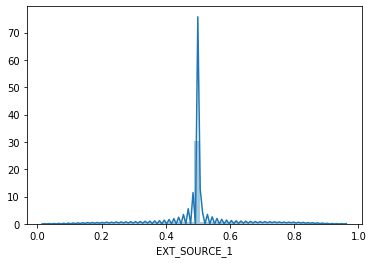

In [64]:
sns.distplot(X_ohe_imp.EXT_SOURCE_1)

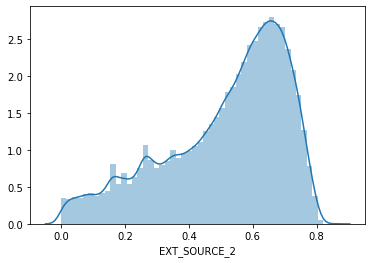

In [63]:
sns.distplot(X_ohe_imp.EXT_SOURCE_2)

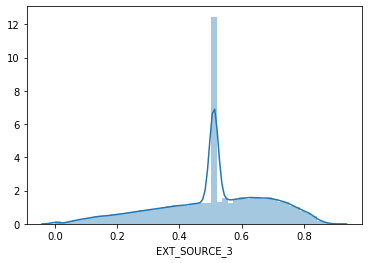

In [65]:
sns.distplot(X_ohe_imp.EXT_SOURCE_3)

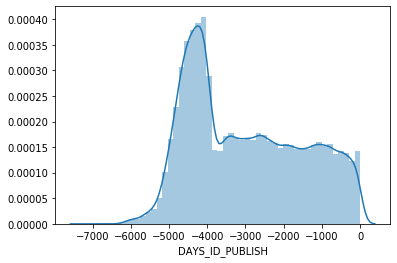

In [66]:
sns.distplot(X_ohe_imp.DAYS_ID_PUBLISH)

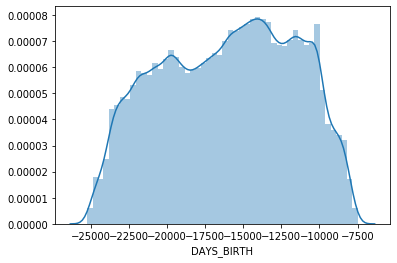

In [68]:
sns.distplot(X_ohe_imp.DAYS_BIRTH)

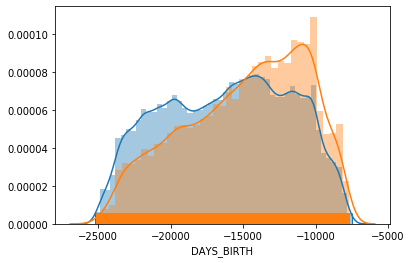

In [79]:
sns.distplot(X_ohe_imp[df_origin['TARGET']==0].DAYS_BIRTH,kde=True,rug=True)
sns.distplot(X_ohe_imp[df_origin['TARGET']==1].DAYS_BIRTH,kde=True,rug=True)

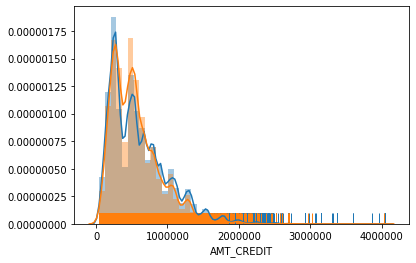

In [78]:
sns.distplot(df_origin[df_origin['TARGET']==0].AMT_CREDIT,kde=True,rug=True)
sns.distplot(df_origin[df_origin['TARGET']==1].AMT_CREDIT,kde=True,rug=True)

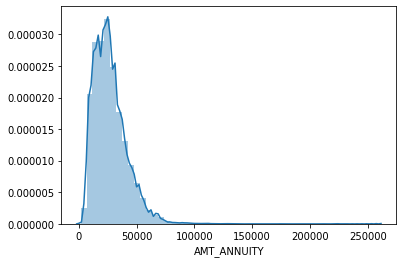

In [80]:
sns.distplot(X_ohe_imp.AMT_ANNUITY)

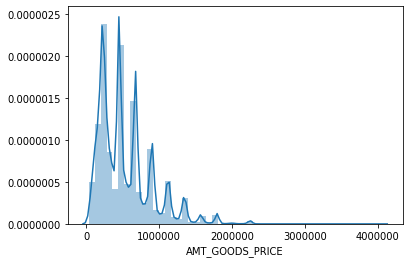

In [82]:
sns.distplot(X_ohe_imp.AMT_GOODS_PRICE)

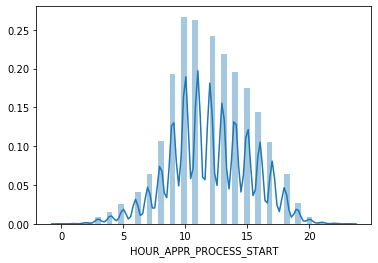

In [84]:
sns.distplot(X_ohe_imp.HOUR_APPR_PROCESS_START)

# 【問題5】（アドバンス課題）カーネルへの投稿
#### Kaggleのカーネルに今回行ったEDAを投稿してみましょう。英語の文章を書くことが難しい場合は、機械翻訳サービスを活用するなどでも構いません。

